# Hands-on Lab: String Patterns, Sorting and Grouping in MySQL

### Objectives
After completing this lab, you will be able to:

- Filter the output of a SELECT query by using string patterns, ranges, or sets of values.
- Sort the result set in either ascending or descending order in accordance with a pre-determined column.
- Group the outcomes of a query based on a selected parameter to further refine the response.
### Software Used in this Lab
In this lab, you will use MySQL. MySQL is a Relational Database Management System (RDBMS) designed to efficiently store, manipulate, and retrieve data.

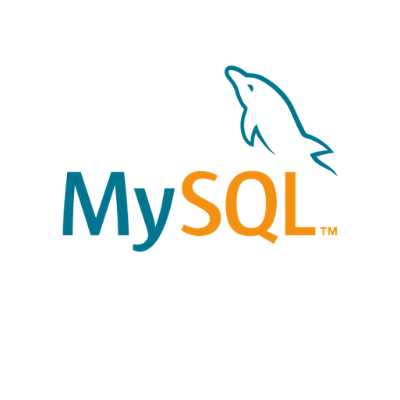

To complete this lab you will utilize MySQL relational database service available as part of IBM Skills Network Labs (SN Labs) Cloud IDE. SN Labs is a virtual lab environment used in this course.

Database Used in this Lab
The database used in this lab is an internal database. You will be working on a sample HR database. This HR database schema consists of 5 tables called EMPLOYEES, JOB_HISTORY, JOBS, DEPARTMENTS and LOCATIONS. Each table has a few rows of sample data. The following diagram shows the tables for the HR database:

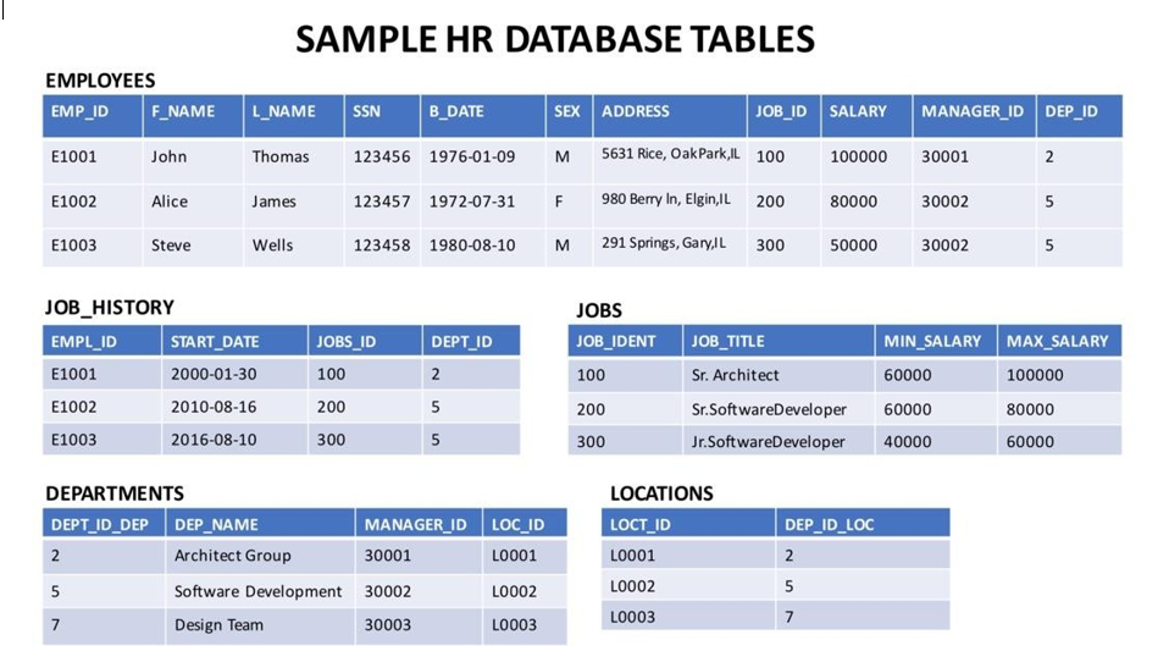

### Load the database
Using the skills acquired in the previous modules, you should first create the database in MySQL. Follow the steps below:

1. Open the phpMyAdmin interface from the Skills Network Toolbox in Cloud IDE.
2. Create a blank database named ‘HR’. Use the script shared in the link below to create the required tables.<br>
   [Script_Create_Tables.sql](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%202/scripts/Script_Create_Tables.sql)
3. Download the files in the links below to your local machine (if not already done in previous labs).<br>
    [Departments.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/datasets/HR_Database/Departments.csv)<br>
    [Jobs.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%202/data/Jobs.csv)<br>
    [JobsHistory.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%202/data/JobsHistory.csv)<br>
    [Locations.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%202/data/Locations.csv)<br>
    [Employees.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%202/data/Employees.csv)<br>

4. Use each of these files to the iterface as data for respective tables in the ‘HR’ database.

### String Patterns
You can use string patterns to filter the response of a query. Let's look at the following example:

Say you need to retrieve the first names `F_NAME` and last names `L_NAME` of all employees who live in `Elgin, IL`. You can use the LIKE operator to retrieve strings that contain the said text. The code will look as shown below.

Query: SELECT F_NAME, L_NAME
FROM EMPLOYEES
WHERE ADDRESS LIKE '%Elgin,IL%';

Upon execution, the query output should appear as shown below:

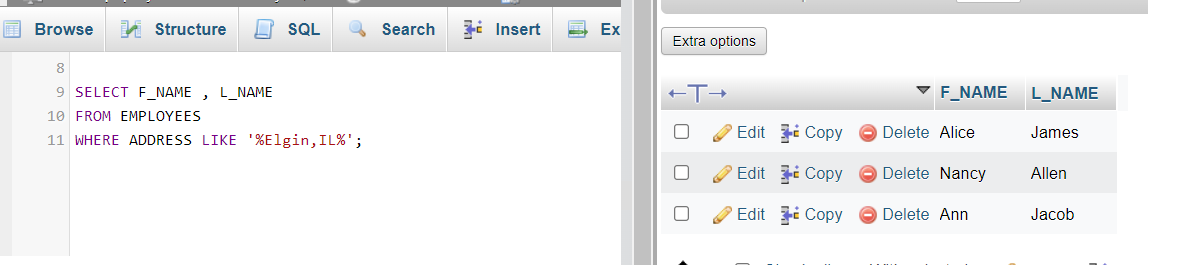

Now assume that you want to identify the employees who were born during the 70s. The query above can be modified to:

Query: SELECT F_NAME, L_NAME
FROM EMPLOYEES
WHERE B_DATE LIKE '197%';

The output for this query will be:

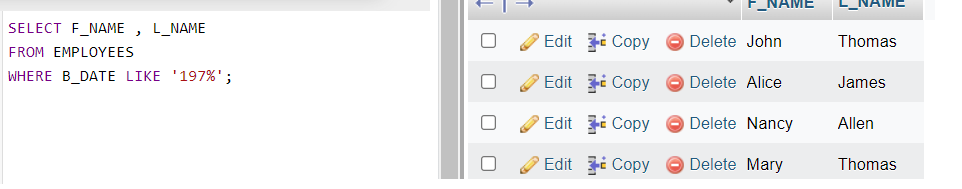

Note that in the first example,` %` sign is used both before and after the required text. This is to indicate, that the address string can have more characters, both before and after, the required text.

In the second example, since the date of birth in `Eployees` records starts with the birth year, the `%` sign is applied after `197%`, indicating that the birth year can be anything between 1970 to 1979. Further the `%` sign also allows any possible date throughout the selected years.

Consider a more specific example. Let us retrieve all employee records in department 5 where salary is between 60000 and 70000. The query that will be used is

Query: SELECT *
FROM EMPLOYEES
WHERE (SALARY BETWEEN 60000 AND 70000) AND DEP_ID = 5;

Output for the query can be seen in the image below.

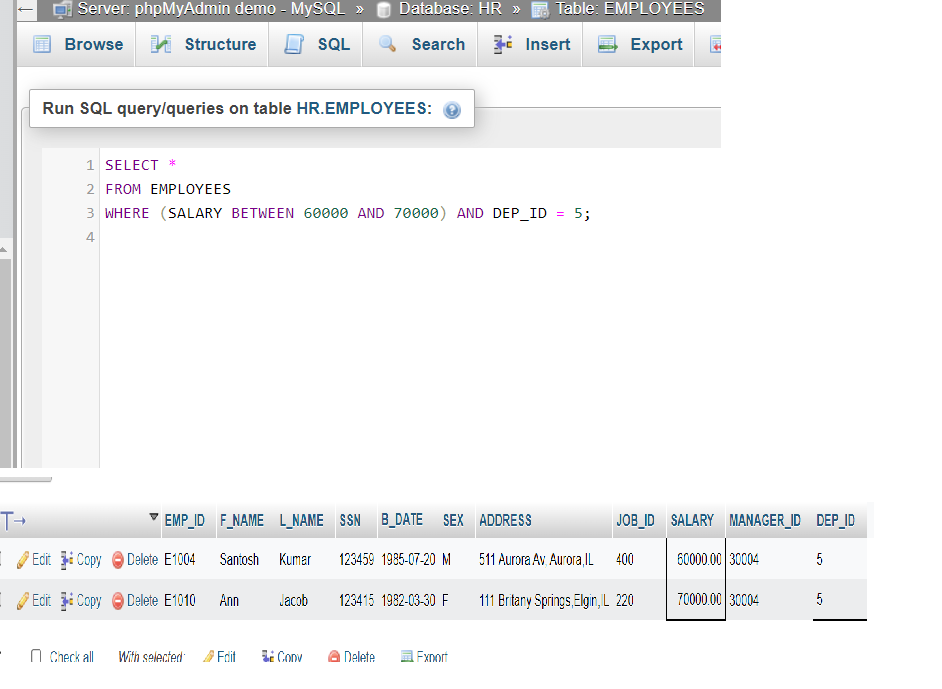

### Sorting
You can sort the retrieved entries on the basis of one or more parameters.

First, assume that you have to retrieve a list of employees ordered by department ID.

Sorting is done using the ORDER BY clause in your SQL query. By default, the ORDER BY clause sorts the records in ascending order.

Query: SELECT F_NAME, L_NAME, DEP_ID 
FROM EMPLOYEES
ORDER BY DEP_ID;

The output for this query will be as shown below.

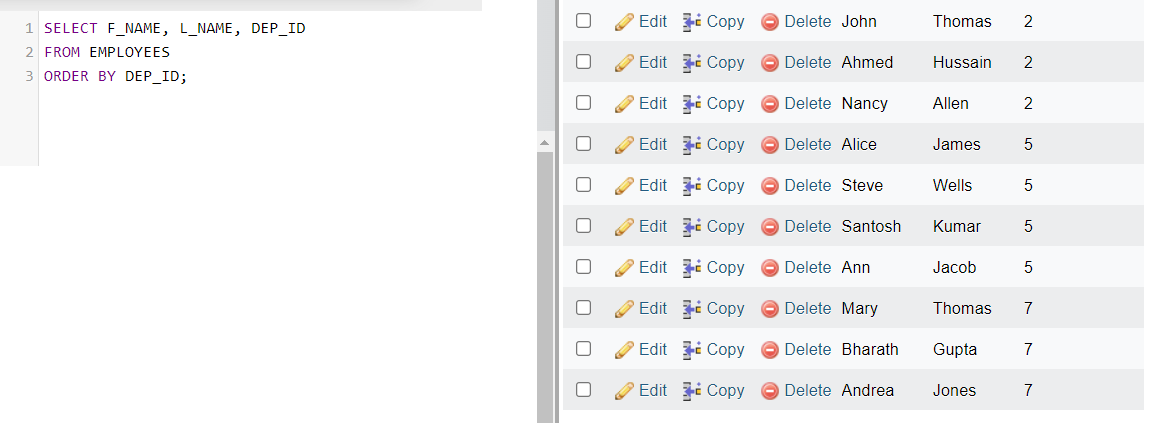

Now, get the output of the same query in descending order of department ID, and within each deaprtment, the records should be ordered in descending alphabetical order by last name. For descending order, you can make use of the DESC clause.

Query: SELECT F_NAME, L_NAME, DEP_ID 
FROM EMPLOYEES
ORDER BY DEP_ID DESC, L_NAME DESC;

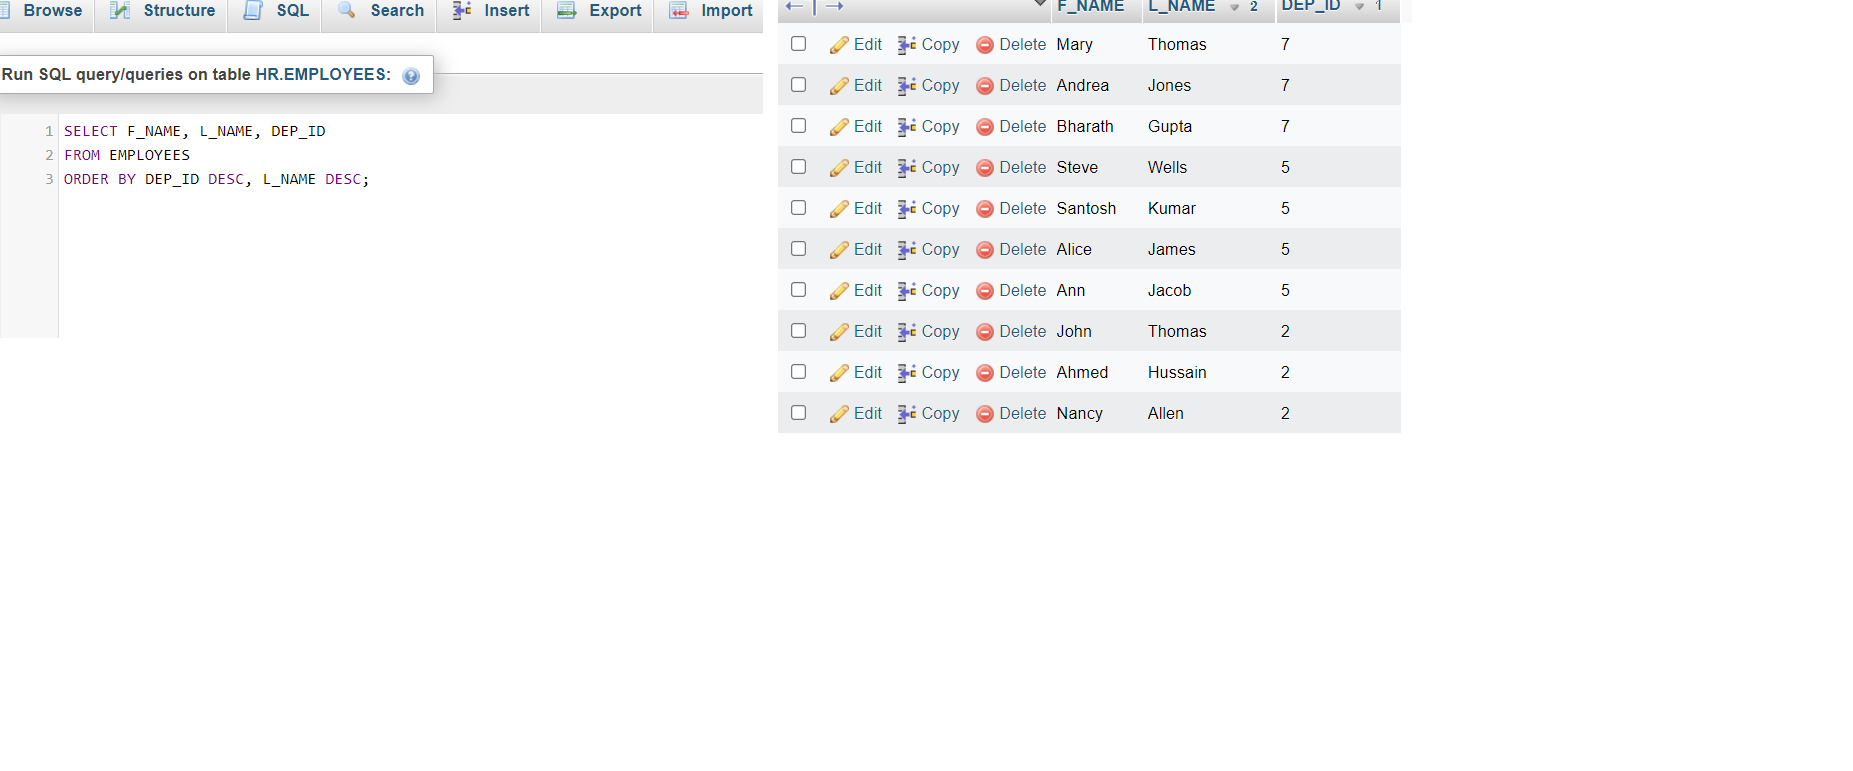

### Grouping
In this exercise, you will go through some SQL problems on Grouping.

NOTE: The SQL problems in this exercise involve usage of SQL Aggregate functions AVG and COUNT. COUNT has been covered earlier. AVG is a function that can be used to calculate the Average or Mean of all values of a specified column in the result set. For example, to retrieve the average salary for all employees in the EMPLOYEES table, issue the query: `SELECT AVG(SALARY) FROM EMPLOYEES;`.

A good example of grouping would be if For each department ID, we wish to retrieve the number of employees in the department.

Query: SELECT DEP_ID, COUNT(*)
FROM EMPLOYEES
GROUP BY DEP_ID;

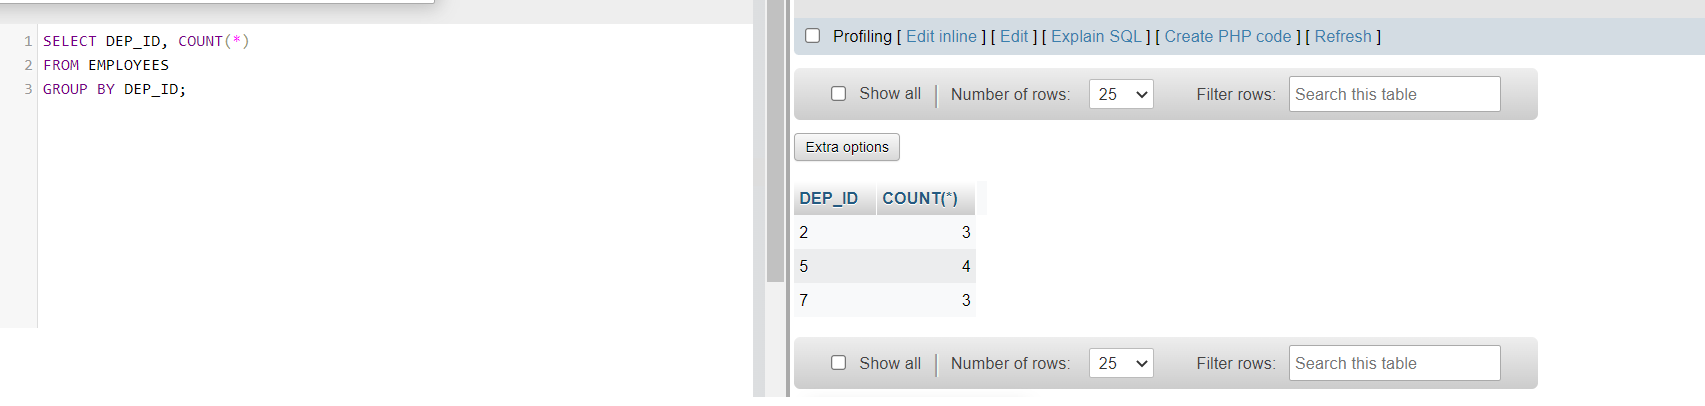

Now, for each department, retrieve the number of employees in the department and the average employee salary in the department. For this, you can use COUNT(*) to retrieve the total count of a column, and AVG() function to compute average salaries, and then GROUP BY.

Query: SELECT DEP_ID, COUNT(*), AVG(SALARY)
FROM EMPLOYEES
GROUP BY DEP_ID;

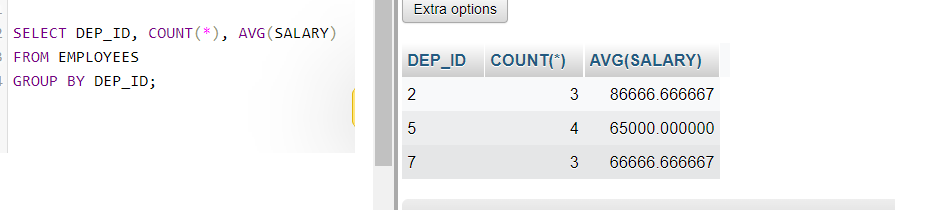

You can refine your outut by using appropriate labels for the columns of data retrieved. Label the computed columns in the result set of the last problem as NUM_EMPLOYEES and AVG_SALARY.

Query: SELECT DEP_ID, COUNT(*) AS "NUM_EMPLOYEES", AVG(SALARY) AS "AVG_SALARY"
FROM EMPLOYEES
GROUP BY DEP_ID;

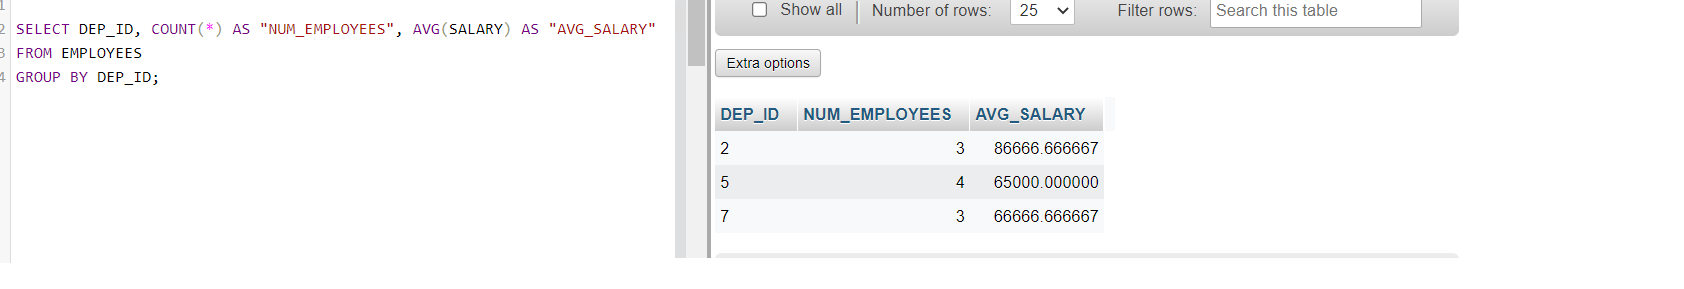

You can also combine the usage of GROUP BY and ORDER BY statements to sort the output of each group in accordance with a specific parameter. It is important to note that in such a case, ORDER BY clause muct be used after the GROUP BY clause. For example, we can sort the result of the previous query by average salary. The SQL query would thus become

Query: SELECT DEP_ID, COUNT(*) AS "NUM_EMPLOYEES", AVG(SALARY) AS "AVG_SALARY"
FROM EMPLOYEES
GROUP BY DEP_ID
ORDER BY AVG_SALARY;

The output of the query should look like:

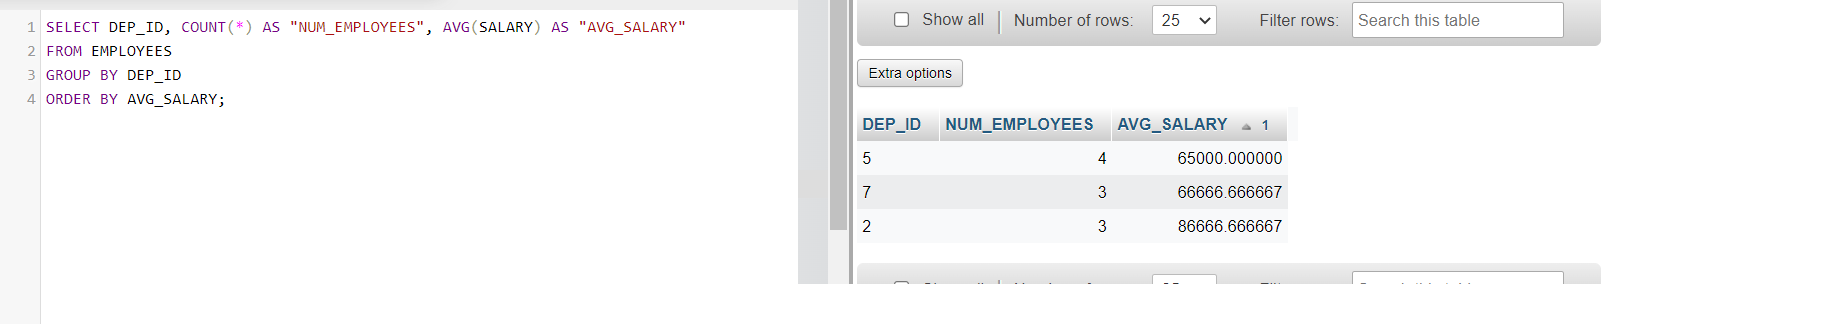

In case you need to filter a grouped response, you have to use the HAVING clause. In the previous example, if we wish to limit the result to departments with fewer than 4 employees, We will have to use HAVING after the GROUP BY, and use the count() function in the HAVING clause instead of the column label.

Query: SELECT DEP_ID, COUNT(*) AS "NUM_EMPLOYEES", AVG(SALARY) AS "AVG_SALARY"
FROM EMPLOYEES
GROUP BY DEP_ID
HAVING count(*) < 4
ORDER BY AVG_SALARY;

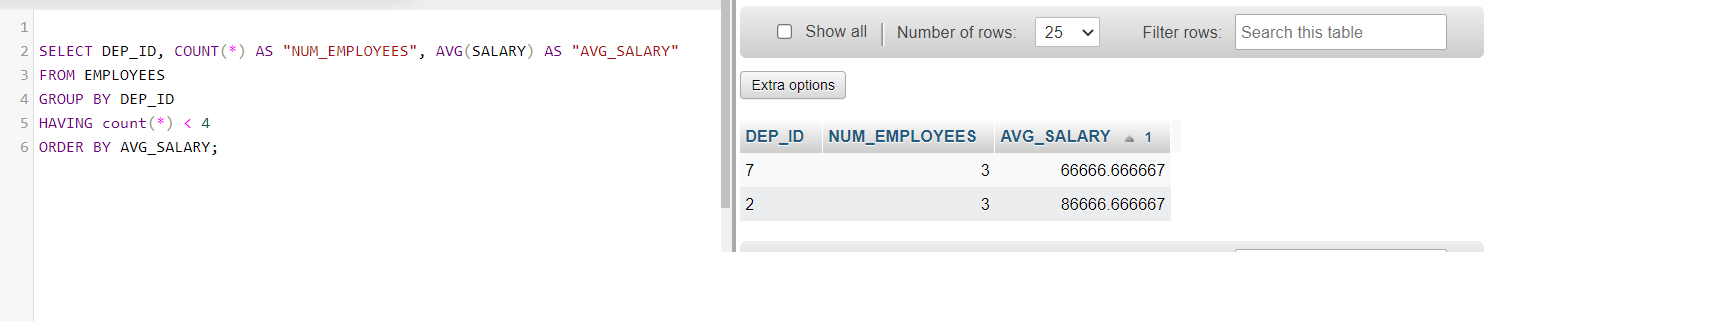

## Practice Questions
1. Retrieve the list of all employees, first and last names, whose first names start with ‘S’.

    `Query`: SELECT F_NAME, L_NAME
    FROM EMPLOYEES
    WHERE F_NAME LIKE 'S%';

2. Arrange all the records of the EMPLOYEES table in ascending order of the date of birth.

    `Query`: SELECT *
    FROM EMPLOYEES
    ORDER BY B_DATE;

3. Group the records in terms of the department IDs and filter them of ones that have average salary more than or equal to 60000. Display the department ID and the average salary.

    `Query`: SELECT DEP_ID, AVG(SALARY)
    FROM EMPLOYEES
    GROUP BY DEP_ID
    HAVING AVG(SALARY) >= 60000;

4. For the problem above, sort the results for each group in descending order of average salary.

    `Query`: SELECT DEP_ID, AVG(SALARY)
    FROM EMPLOYEES
    GROUP BY DEP_ID
    HAVING AVG(SALARY) >= 60000
    ORDER BY AVG(SALARY) DESC;